In [1]:
import numpy as np

In [2]:
from sectionproperties.pre.library import concrete_rectangular_section

from concreteproperties import (
    Concrete,
    ConcreteLinearNoTension,
    ConcreteSection,
    RectangularStressBlock,
    SteelBar,
    SteelElasticPlastic,
    add_bar_circular_array
)
from concreteproperties.pre import add_bar

from concreteproperties.results import MomentCurvatureResults

In [3]:
concrete = Concrete(
    name="32 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinearNoTension(elastic_modulus=36.1e3, ultimate_strain=0.003),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=35,
        alpha=0.802,
        gamma=0.89,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.4,
    colour="lightgrey",
)

bst550 = SteelBar(
    name="bst550 MPa",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=550,
        elastic_modulus=205e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

SAS670 = SteelBar(
    name="SAS670",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=670,
        elastic_modulus=205e3,
        fracture_strain=0.05,
    ),
    colour="blue",
)

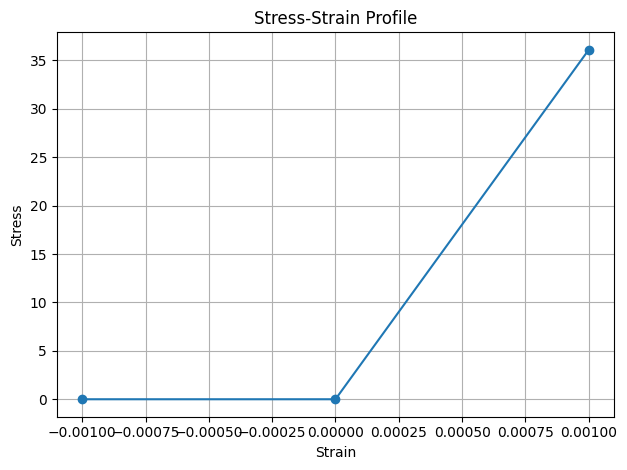

<Axes: title={'center': 'Stress-Strain Profile'}, xlabel='Strain', ylabel='Stress'>

In [4]:

concrete.stress_strain_profile.plot_stress_strain()

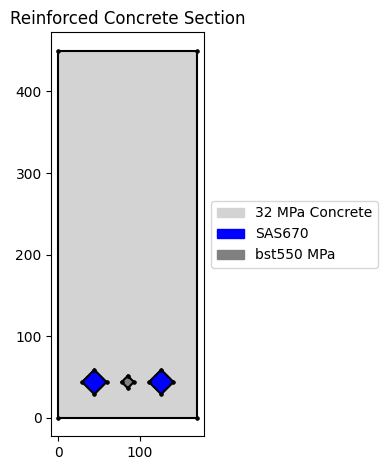

<Axes: title={'center': 'Reinforced Concrete Section'}>

In [5]:
rect = concrete_rectangular_section(
    d=450,
    b=170,
    dia_top=0,
    area_top=0,
    n_top=0,
    c_top=0,
    dia_bot=18,
    area_bot=450,
    n_bot=2,
    c_bot=35,
    conc_mat=concrete,
    steel_mat=SAS670,
)
geom = add_bar(
  geometry=rect, area=12**2/4*3.14, material=bst550, x=170/2, y=44
)
conc_sec = ConcreteSection(geom)
conc_sec.plot_section()

In [6]:
# perform moment curvature analysis and store results
# bending about major axis so theta = pi/2
res = conc_sec.moment_curvature_analysis(
    theta=np.pi / 2, kappa_inc=2.5e-7, progress_bar=False
)


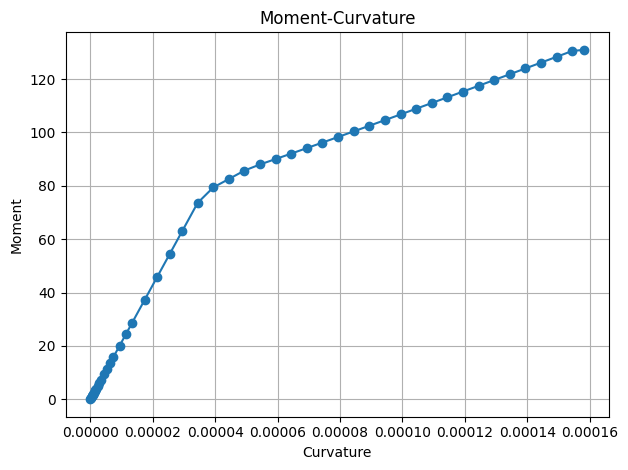

<Axes: title={'center': 'Moment-Curvature'}, xlabel='Curvature', ylabel='Moment'>

In [7]:
MomentCurvatureResults.plot_results(res)

In [8]:
epsilon_s = 670/205000


In [9]:
A_s1 = 18**2/4*3.14*2
A_s2 = 12**2/4*3.14

x = 2*(A_s1 * 550 + A_s2*670) / (35*170)
x

119.49942857142857